<h2>FIN5615 Project #2
    <p class="text-primary">Random Walk Simulaton (Part I)</p>
</h2>

<div class = "panel panel-success">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Project Introduction</b>
    </div>
    <div class = "panel-body"> 
    In this project we will try to address some of the shortcomings of modeling stock price as a simple random walk. We will compare the simulated option prices from our random walk model against that of the Black-Scholes options pricing formula.
    </div>
</div>
<div class = "panel panel-info">
    <div class = "panel-heading"> 
    <span style="color:black"><b>Instructions</b>
    </div>
    <div class = "panel-body"> 
    Please code you solutions directly in this Notebook under each task in the cells provided below. Include all code used to produce your results, and support your answers with textual explanations if neccessary. You may feel free to add additional Code and/or Markdown cells as needed. Code must be written using <b>Python 3</b>.
    <br><br>Please order the cells in your Notebook in the order in which they are intended to run! It is expected that your Notebook is able to run in sequence from start to finish without any errors (before submitting check by: <code>Kernel > Restart & Run All</code>).
    <br><br>Once ready, please submit your assignment as an <b>.ipynb file</b> (<code>File > Download as > Notebook</code>). You must name your files in the following format: <b><code>FIN5615_Project_1_Richard_Lee_tuc12345.ipynb</code></b>.
    </div>
</div>

---
<div class = "alert alert-block alert-warning">
    <b>Note</b>: Import all libraries that you plan on using in the code block below.
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 1</b>
    </div>
    <div class = "panel-body"> 
    Continue with the example of Ford (F) stock price from the end of Lecture 3. Assume that daily price movements of F follow a simple random walk, and that the price of F today is \$5.
    <ul>
        <li>Simulate the price of F over the next year (250 trading days) for 1000 trials.</li>
        <li>Plot the histogram of the probability distribution of F's stock price at the end of the year.</li>
    </ul>
    <br>Set the random seed to 5615 at the beginning of your code.
    <br><br>Your simulation should be a list of length 1000 (i.e. 1000 trials), with each element being a list of length 251 (i.e. price at time 0 plus 250 future time steps). Your histogram should have a bell shape and centered at approximately \$5.
    <p style="text-align:right;">[15pts]</p>
    </div>
</div>

In [2]:
###Use code below
random.seed(5615)

starting_value = 5.
steps = 250
trials = 1000

sims = []
for trial in range(trials):
    random_path = [starting_value]
    for step in range(steps) :
        if random.random() < .5:
            price_change = 1 
        else:
            price_change = -1
        random_path.append(random_path[-1] + price_change)
    sims.append(random_path)
len(sims)
















1000

In [3]:
len(sims[0])

251

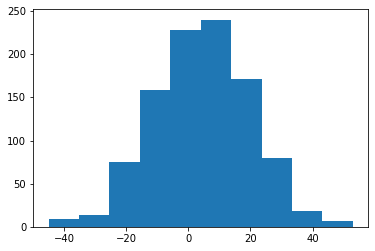

In [4]:
ending_prices = [trial[-1] for trial in sims]
ending_prices
plt.hist(ending_prices)
plt.show()

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 2</b>
    </div>
    <div class = "panel-body"> 
    One problem that arises when naively modeling stock price as a random walk is that simulated prices are not guarenteed to be positive. In the case of a simple random walk, we are assuming stock prices change by an arbitrary +\$1 or -\$1 at each time step.
    <br><br>Instead of assuming a price movement of +\$1 or -\$1, modify the random walk's possible price movement to be either +1% or -1% (equivalently, a mutiplicative factor of 1.01 or 0.99):
    <br><br>
    $$X_{t+1} = \left\{
        \begin{array}{ll}
            X_t \times 1.01 & \quad p = 0.5 \\
            X_t \times 0.99 & \quad p = 0.5
        \end{array}
    \right.$$
    <ul>
        <li>Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.</li>
        <li>Plot a histogram of the probability distribution of F's stock price at the end of the year.</li>
        <li>Explain why making this adjustment prevents the stock price from becoming negative.</li>
    </ul>
    <br>Set the random seed to 5615 at the beginning of your code.
    <br><br>Your simulation should still have the same length as the previous task, but the histogram should now be skewed to the right.
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [5]:
###Use code below
random.seed(5615)

starting_value = 5.
steps = 250
trials = 1000
###

sims = []
for trial in range(trials):
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < .5:
            price_change = 1.01
        else:
            price_change = .99
        random_path.append(random_path[-1]*price_change)
    sims.append(random_path)
len(sims)
















1000

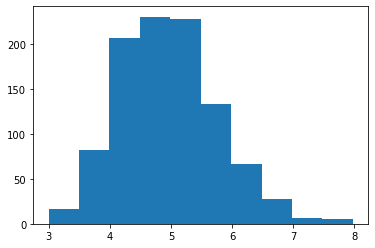

In [6]:
ending_prices = [trial [-1] for trial in sims]
ending_prices
plt.hist(ending_prices)
plt.show()

*Your written response here*




<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 3</b>
    </div>
    <div class = "panel-body"> 
    Another issue with our current random walk model is that the magnitude of the stock price's movement is the same regardless of the frequency of our simulation.
    <br><br>For example, if we simulate quarterly increments, then the stock price can exhibit only 4 up or down movements of 1% within one year, whereas if we simulate in daily increments the stock price can have 250 up or down movements of 1% within one year, resulting in a much wider distribution of ending prices. This type of behavior is unreasonable.
    <br><br>We can try to remedy this by adjusting the magnitude of the stock price movement by the "step size" (h) of our simulation:
    <br><br>
    $$X_{t+1} = \left\{
        \begin{array}{ll}
            X_t \times (1 + 0.01\sqrt{h}) & \quad p = 0.5 \\
            X_t \times (1 - 0.01\sqrt{h}) & \quad p = 0.5
        \end{array}
    \right.$$
    <br>Under this new model specification, we can interpret 1% as the percentage movement in stock price over an annual period, and multiplying it by $\sqrt{h}$ scales it for the length of time for a single period of our simulated random walk, where $h = \frac{1}{steps}$. For example, under daily increments, $h = \frac{1}{250}$.
    <ul>
        <li>Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.</li>
        <li>Plot a histogram of the probability distribution of F's stock price at the end of the year.</li>
    </ul>
    Set the random seed to 5615 at the beginning of your code.
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

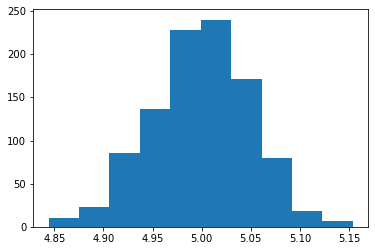

In [7]:
###Use code below
random.seed(5615)

starting_value = 5.
steps = 250
trials = 1000
###

sims = []
for trial in range (trials):
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < .5:
            price_change = 1 + .01*np.sqrt(1/steps)
        else:
            price_change = 1 - .01*np.sqrt(1/steps)
        random_path.append(random_path[-1]*price_change)
    sims.append(random_path)


ending_prices = [trial[-1] for trial in sims]
ending_prices
plt.hist(ending_prices)
plt.show()














In [8]:
len(sims)

1000

In [9]:
ending_prices

[4.980813239087163,
 4.868689364478202,
 5.006078247631537,
 4.993429764371325,
 4.980813239087165,
 5.056993382519014,
 4.961948195790334,
 4.949411212629471,
 5.03147141208664,
 4.961948195790338,
 5.025111070861946,
 5.012414498791657,
 4.930665105851704,
 5.0378398036688115,
 4.924432195045014,
 5.037839803668811,
 4.943154604652326,
 5.006078247631545,
 5.025111070861946,
 4.993429764371326,
 4.949411212629475,
 5.006078247631542,
 4.955675739667723,
 5.006078247631539,
 4.980813239087161,
 5.006078247631538,
 5.050600778676211,
 5.05060077867622,
 5.018758769818176,
 4.987117512033632,
 5.031471412086638,
 4.930665105851707,
 4.905780697365327,
 4.918207163333001,
 4.980813239087163,
 5.025111070861941,
 4.974516935445052,
 4.961948195790339,
 4.9934297643713235,
 4.943154604652317,
 5.012414498791657,
 5.082644812292686,
 5.031471412086636,
 4.999750006199824,
 4.887199843031293,
 4.943154604652328,
 4.961948195790336,
 4.98711751203364,
 4.974516935445059,
 5.006078247631543,
 

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 4</b>
    </div>
    <div class = "panel-body"> 
    Another issue with our current random walk model is that our assumed annual magnitude of the stock price's movement is the same 1% regardless of the risk profile of the company. For example, an annual movement of 1% might seem reasonable for F, but definitely not for TSLA stock.
    <br><br>We can try to account for this by including the stock's annual volaility as another input parameter to our random walk simulation. Recall that the volatility is a measure of the disperson (a.k.a. standard deviation) on a stock's *continuously compounded returns*.
    <br><br>So, we can replace our arbitrary value of 1% with a change in the stock's return in that time step in terms of its annual volatility ($\sigma$), applied as continuously compounded factors, $u$ and $d$:
    <br><br>
    $$X_{t+1} = \left\{
        \begin{array}{ll}
            X_t \times u = X_te^{\sigma\sqrt{h}} & \quad p = 0.5 \\
            X_t \times d = X_te^{-\sigma\sqrt{h}} & \quad p = 0.5
        \end{array}
    \right.$$
    <br>Assume that the annual volatility of F's returns is 10%:
    <ul>
        <li>Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.</li>
        <li>Calculate F's simulated annual rate of return for each of the 1000 trials. Plot this distribution of annual returns in a histogram.</li>
        <li>Calculate F's average simulated annual rate of return.</li> 
    </ul>
    Set the random seed to 5615 at the beginning of your code.
    <br><br>The histogram of simulated annual returns should be bell shaped with a mean of approximately 0%.
    <p style="text-align:right;">[20pts]</p>
    </div>
</div>

In [10]:
###Use code below
random.seed(5615)

starting_value = 5.
sigma = .1

steps = 250
trials = 1000

u = np.exp(sigma * np.sqrt(1/steps))
d = np.exp(-sigma * np.sqrt(1/steps))

sims = []
for trial in range(trials):
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < .5:
            price_change = u
        else:
            price_change = d
        random_path.append(random_path[-1] * price_change)
    sims.append(random_path)
len(sims)











1000

In [11]:
len(sims[0])

251

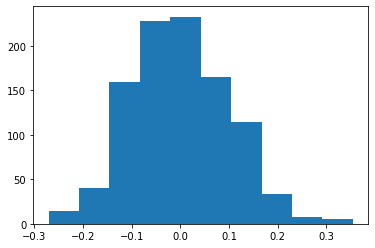

In [12]:
annual_return = [((trial[-1] - starting_value)/starting_value) for trial in sims]
annual_return
plt.hist(annual_return)
plt.show()

In [13]:
average = np.mean(annual_return)

average

0.0016874375378452355

<div class = "panel panel-primary">
    <div class = "panel-heading"> 
    <span style="color:white"><b>Task 5</b>
    </div>
    <div class = "panel-body"> 
    It is not very realistic to model 0% rates of return on stock prices. It is generally the investor's belief that stock prices will increase over time, although at what rate is unclear. For now, let's assume that the expected return on the stock is equal to the risk-free rate.
    <br><br>We can achieve this by adjusting the probabilities associated with an up or down movement in the stock price from 50% to a varying value of $p$, such that on average we receive the risk free rate of return (I will skip over the math here, but this is the idea of risk-neutral pricing):
    <br><br>
    $$X_{t+1} = \left\{
        \begin{array}{ll}
            X_t \times u = X_te^{\sigma\sqrt{h}} & \quad p = \frac{e^{rh} - d}{u - d} \\
            X_t \times d = X_te^{-\sigma\sqrt{h}} & \quad 1 - p
        \end{array}
    \right.$$ 
    <br>Notice that the value of $p$ is now set by a formula, and depends on the values of $u$ and $d$, which are just the multiplicative factors on the stock price that we defined previously.
    <br><br>Assume that the annual volatility of F's returns is 10% and a risk-free rate of 1%:
    <ul>
        <li>Simulate the price of F under this new dynamic over the next year (250 trading days) for 1000 trials.</li>
        <li>Plot a sample of 100 paths from the simulation on a single line plot. Your plot should look something like this: ![Task_5_Plot.JPG](attachment:Task_5_Plot.JPG)</li>
        <li>Calculate the average path for F's stock price over the 1000 trials. Plot this as a line plot.</li>
        <li>Calculate F's average simulated annual rate of return. Is it close to our assumed risk-free rate?</li>
    </ul>
    <br>Set the random seed to 5615 at the beginning of your code.
    <br><br>Note that the values for $u$, $d$, and $p$ do not vary by time step. Check that they are approximately equal to 1.0063, 0.9937, and 0.5016, respectively.
    <p style="text-align:right;">[25pts]</p>
    </div>
</div>

In [14]:
###Use code below
random.seed(5615)

starting_value = 5.
sigma = .1
risk_free = .01

steps = 250
trials = 1000

p = (np.exp(risk_free*(1/250)) - d) /(u-d)
u = np.exp(sigma * np.sqrt(1/steps))
d = np.exp(-sigma*np.sqrt(1/steps))

sims = []
for trial in range(trials):
    random_path = [starting_value]
    for step in range(steps):
        if random.random() < p:
            price_change = u
        else:
            price_change = d
        random_path.append(random_path[-1] * price_change)
    sims.append(random_path)
len(sims)



















1000

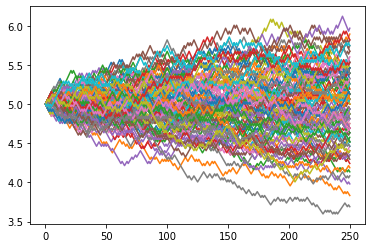

In [15]:
for i in range(100):
    plt.plot(sims[i])
plt.show()

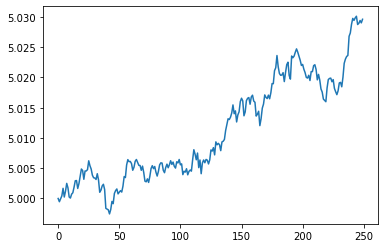

In [16]:
average_path = []
for step in range(steps):
    average_price = np.mean([trial[step] for trial in sims])
    average_path.append(average_price)
plt.plot(average_path)
plt.show()

In [20]:
ending_price = [trial[-1] for trial in sims]
average_price1 = np.mean(ending_price)
average_price1


5.031835840527049

In [18]:
annual_return = [((trial[-1] - starting_value)/starting_value)for trial in sims]
average_price2 = np.mean(annual_return)
average_price2

0.0063671681054099415